In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
import cv2
import tifffile

In [2]:
def get_list_of_files(address):
    
    files_c = glob.glob(os.path.join(address,"*_CLS.tif"))
    files_h = glob.glob(os.path.join(address,"*_AGL.tif"))
    
    return sorted(files_c),sorted(files_h)

files_c,files_h=get_list_of_files('/data/Public Data/IEEE Data Fusion Contest 2019/DFC2019_track1_trainval/Train2-Track1/')

In [3]:
len(files_c)
len(files_h)

2478

In [4]:
img=tifffile.imread(files_c[0])[:,:,np.newaxis]
img.shape

(1024, 1024, 1)

In [5]:
from tqdm import tqdm

all_c2d=np.zeros([img.shape[0],img.shape[1],2783])
all_h2d=np.zeros([img.shape[0],img.shape[1],2783])

for i in tqdm(range(len(files_c))):
    temp_c2d=tifffile.imread(files_c[i])
    temp_h2d=tifffile.imread(files_h[i])
    all_c2d[:,:,i]=temp_c2d
    all_h2d[:,:,i]=temp_h2d

100%|██████████| 2478/2478 [05:05<00:00,  7.46it/s]


In [6]:
all_c1d=all_c2d.flatten()
all_h1d=all_h2d.flatten()
print(all_c1d.shape,all_h1d.shape)

(2918187008,) (2918187008,)


In [10]:
del temp_c2d
del temp_h2d

In [11]:
del img

In [7]:
del all_c2d
del all_h2d

In [12]:
idx=np.random.choice(2918187008,182386688,replace=False)

## Scatter density

Text(0.5, 1.0, 'Correlation between Label & Height')

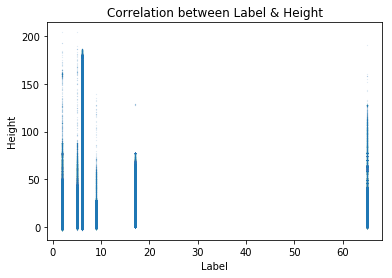

In [13]:
plt.scatter(all_c1d[idx],all_h1d[idx],marker='.',s=0.01)
plt.xlabel('Label')
plt.ylabel('Height')
plt.title('Correlation between Label & Height')

## Histogram

/home/sigma_wd/anaconda3/envs/pytorch/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/sigma_wd/anaconda3/envs/pytorch/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


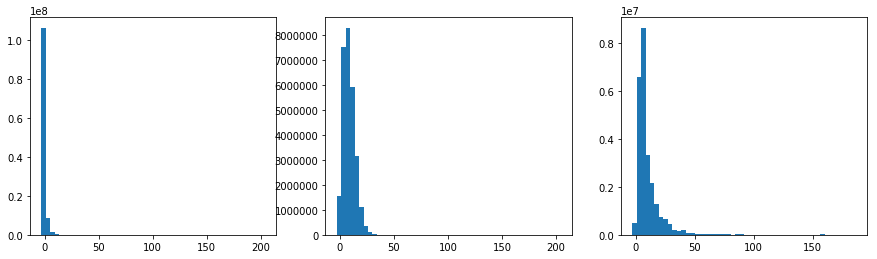

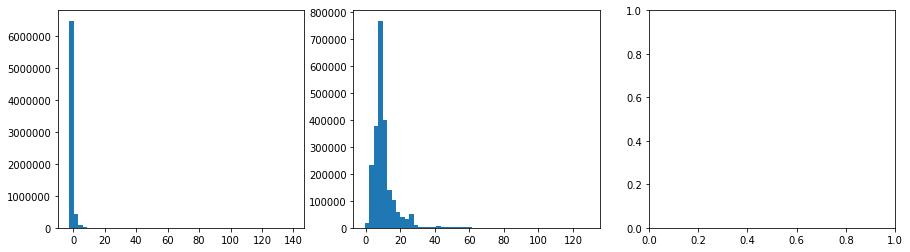

In [17]:
sample_c1d=all_c1d[idx]
sample_h1d=all_h1d[idx]

plt.figure(2,figsize=(15,4))
plt.subplot(1,3,1)
ground=sample_h1d[sample_c1d==2]
plt.hist(ground,bins=50)
plt.subplot(1,3,2)
tree=sample_h1d[sample_c1d==5]
plt.hist(tree,bins=50)
plt.subplot(1,3,3)
building=sample_h1d[sample_c1d==6]
plt.hist(building,bins=50)

plt.figure(3,figsize=(15,4))
plt.subplot(1,3,1)
water=sample_h1d[sample_c1d==9]
plt.hist(water,bins=50)

plt.subplot(1,3,2)
road=sample_h1d[sample_c1d==17]
plt.hist(road,bins=50)

plt.subplot(1,3,3)

In [8]:
all_ground=all_h1d[all_c1d==2]
all_tree=all_h1d[all_c1d==5]
all_building=all_h1d[all_c1d==6]
all_water=all_h1d[all_c1d==9]
all_road=all_h1d[all_c1d==17]

In [22]:
del sample_c1d
del sample_h1d

In [9]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

## Tabulate

##### ground

In [52]:
g1=pd.value_counts(all_ground.astype(int),normalize=False)
g2=pd.value_counts(all_ground.astype(int),normalize=True)
arr_g=pd.concat([g1,g2.apply(lambda x: format(x, '.3%'))],axis=1)
arr_g.sort_index()

,0,1
-9223372036854775808,31,0.000%
-3,75,0.000%
-2,13955,0.001%
-1,120725,0.006%
0,1710725887,91.036%
1,64994893,3.459%
2,33039130,1.758%
3,21454631,1.142%
4,13729903,0.731%
5,9137150,0.486%


##### tree

In [10]:
t1=pd.value_counts(all_tree.astype(int),normalize=False)
t2=pd.value_counts(all_tree.astype(int),normalize=True)
arr_t=pd.concat([t1,t2.apply(lambda x: format(x, '.3%'))],axis=1)
arr_t.sort_index()

,0,1
-9223372036854775808,13,0.000%
-3,2,0.000%
-2,626,0.000%
-1,1048,0.000%
0,19180213,4.954%
1,16724113,4.319%
2,25162087,6.498%
3,28901348,7.464%
4,29101331,7.516%
5,29744506,7.682%


##### building

In [50]:
b1=pd.value_counts(all_building.astype(int),normalize=False)
b2=pd.value_counts(all_building.astype(int),normalize=True)
arr_b=pd.concat([b1,b2.apply(lambda x: format(x, '.3%'))],axis=1)
arr_b.sort_index()

,0,1
-9223372036854775808,24,0.000%
-5,3,0.000%
-4,4,0.000%
-3,2,0.000%
-2,2111,0.001%
-1,4871,0.001%
0,8563384,2.100%
1,8795600,2.157%
2,17184540,4.214%
3,40455769,9.921%


##### water

In [49]:
w1=pd.value_counts(all_water.astype(int),normalize=False)
w2=pd.value_counts(all_water.astype(int),normalize=True)
arr_w=pd.concat([w1,w2.apply(lambda x: format(x, '.3%'))],axis=1)
arr_w.sort_index()

,0,1
-9223372036854775808,3,0.000%
-2,557,0.000%
-1,4455,0.004%
0,107512302,95.033%
1,2139751,1.891%
2,932709,0.824%
3,712969,0.630%
4,669200,0.592%
5,359548,0.318%
6,232374,0.205%


##### road

In [48]:
r1=pd.value_counts(all_road.astype(int),normalize=False)
r2=pd.value_counts(all_road.astype(int),normalize=True)
arr_r=pd.concat([r1,r2.apply(lambda x: format(x, '.3%'))],axis=1)
arr_r.sort_index()

,0,1
-1,2,0.000%
0,156794,0.431%
1,107874,0.297%
2,989937,2.721%
3,1696712,4.664%
4,1771642,4.870%
5,2035529,5.595%
6,2751146,7.562%
7,3231458,8.882%
8,5883530,16.172%
